# Cleaning US Census Data

The objective of this project is to organize data from multiple csv files in such a way that the data can be used to make some useful histograms and scatterplots. One of the scatterplots to be made should show the average income in a state vs proportion of women in that state 

## Inspecting the Data

First we use `glob` to loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called `us_census`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
files = glob.glob("states*.csv")

states_list = []
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)

us_census = pd.concat(states_list)

Checking the columns of the table and their respective data types

In [2]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


We notice here that most of the data types here are objects. Let us view some of the first elements of our data frame by calling the `head()` function so as to get an idea why this might be the case.

In [3]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


## Using Regex

Turning the `Income` column into a format that is ready for conversion into a numerical type.

In [4]:
for index in range(0,len(us_census["Income"])):
    string = str(us_census['Income'].iat[index])
    replace_dol = string.replace('$', '')
    replace_com = replace_dol.replace(',', '')
    us_census['Income'].iat[index] = replace_com

us_census["Income"] = pd.to_numeric(us_census['Income'])
us_census["Income"]

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64

Splitting the `GenderPop` column into two new columns the `Men` column, and the `Women` column using `str.split` and separating those results.

In [5]:
us_census['GenderPop'].head()

Men = []
Women = []
for index in range(0,len(us_census["GenderPop"])):
    string = str(us_census['GenderPop'].iat[index])
    replace = string.split('_')
    Men.append(replace[0])
    Women.append(replace[1])

us_census['Men'] = Men
us_census['Women'] = Women

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316M,13367298F


Removing `M` and `F` in each entry and converting the both columns into numerical data types.

In [6]:
for index in range(0,len(us_census["Men"])):
    string = str(us_census['Men'].iat[index])
    replace = string.replace('M', '')
    us_census['Men'].iat[index] = replace
    
for index in range(0,len(us_census["Women"])):
    string = str(us_census['Women'].iat[index])
    replace = string.replace('F', '')
    us_census['Women'].iat[index] = replace
    
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


Now we have modified our data so that we can make the scatterplot that was hsowing 
Making a scatterplot that shows average income in a state vs proportion of women in that state.

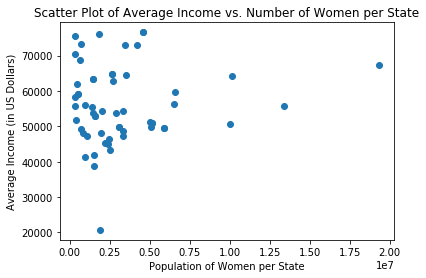

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Average Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Average Income (in US Dollars)")
plt.show()
plt.clf()